# YouTube Fitness Veri Analizi Projesi

### 1. Giriş ve Proje Amacı

Bu projede, YouTube Data API'sini kullanarak popüler fitness egzersizleri ("squat", "push-up", "plank", "lunge", "burpee") hakkında veri analizi gerçekleştireceğim. Projenin ana amacı, bu egzersizlerin YouTube'daki izlenme ve etkileşim oranlarını karşılaştırmak, böylece hangi içeriklerin izleyici kitlesi tarafından en çok ilgi gördüğünü belirlemektir.

### 2. Bu kod, projeniz için gerekli kütüphaneleri bilgisayarınıza yükler.



In [23]:
# Gerekli kütüphaneleri yükleme
!pip install pandas
!pip install google-api-python-client
!pip install python-dotenv


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 3. Gerekli Kütüphaneler ve Güvenli Ortam Ayarları

Bu bölümde, projemiz için gerekli olan kütüphaneleri yükleyecek ve API anahtarımızı güvenli bir şekilde kullanmak için ortam ayarlarını yapacağız. Bu yaklaşım, hassas bilgilerin herkese açık bir platformda (GitHub gibi) görünmesini engelleyerek projenin güvenliğini sağlar.

In [24]:
# Kütüphaneleri içe aktarma
import pandas as pd
from googleapiclient.discovery import build
from dotenv import load_dotenv
import os

# .env dosyasındaki bilgileri yükleme
load_dotenv()

True

### API Servisine Bağlanma
Bu adımda, daha önce .env dosyasında güvenli bir şekilde sakladığımız API anahtarını kullanacağız. python-dotenv kütüphanesi sayesinde anahtarımızı kodun içine yazmadan API'ye güvenli bir şekilde bağlanabileceğiz. Bu, projenizin güvenliğini sağlarken başkalarının da projenizi kullanabilmesini kolaylaştırır.

In [25]:
# API anahtarını .env dosyasından al
API_KEY = os.getenv("YOUTUBE_API_KEY")

# API servisi oluştur
youtube = build('youtube', 'v3', developerKey=API_KEY)

print("YouTube API'ye başarıyla bağlandı!")

YouTube API'ye başarıyla bağlandı!


### 4. Veri Toplama
Bu bölümde, analize dahil etmek istediğimiz fitness egzersizlerini tanımlayacağız ve YouTube API'sini kullanarak bu egzersizlerle ilgili en popüler videoların verilerini çekeceğiz

In [37]:
# Analiz edeceğimiz fitness egzersizleri
exercise_keywords = ["squat", "push-up", "plank", "lunge", "burpee"]

# Verileri saklamak için boş liste oluştur
video_data_list = []

# Her bir egzersiz için arama yap
for keyword in exercise_keywords:
    search_query = keyword + " tutorial"
    print(f"'{search_query}' için video verileri toplanıyor...")
    
    # API isteği
    request = youtube.search().list(
        q=search_query,
        part="snippet",
        type="video",
        maxResults=50
    )
    
    response = request.execute()
    
    for item in response['items']:
        if 'videoId' in item['id']:
            video_id = item['id']['videoId']
            video_title = item['snippet']['title']
            channel_title = item['snippet']['channelTitle']
            
            # Ek video detaylarını al (izlenme, beğeni, yorum)
            video_stats_request = youtube.videos().list(
                part="statistics",
                id=video_id
            )
            video_stats = video_stats_request.execute()
            
            # İstatistiklerin mevcut olup olmadığını kontrol et
            if video_stats['items']:
                stats = video_stats['items'][0]['statistics']
                views = int(stats.get('viewCount', 0))
                likes = int(stats.get('likeCount', 0))
                comments = int(stats.get('commentCount', 0))
                
                video_data_list.append({
                    'keyword': keyword,
                    'video_id': video_id,
                    'title': video_title,
                    'channel': channel_title,
                    'views': views,
                    'likes': likes,
                    'comments': comments
                })

print("\nTüm veri toplama işlemi tamamlandı!")

'squat tutorial' için video verileri toplanıyor...
'push-up tutorial' için video verileri toplanıyor...
'plank tutorial' için video verileri toplanıyor...
'lunge tutorial' için video verileri toplanıyor...
'burpee tutorial' için video verileri toplanıyor...

Tüm veri toplama işlemi tamamlandı!


### 5. Veri Hazırlığı ve Analiz
Bu bölümde, topladığımız video verilerini düzenli bir DataFrame'e dönüştüreceğiz ve temel analizler yaparak projemizin ana sorularına yanıt aramaya başlayacağız.

In [84]:
# Veriyi DataFrame'e dönüştürme
df = pd.DataFrame(video_data_list)

# Her bir egzersiz için toplam izlenme sayısını bul
total_views_by_exercise = df.groupby('keyword')['views'].sum().sort_values(ascending=False)

print("\nHer bir egzersiz için toplam izlenme sayısı:")
print(total_views_by_exercise)


Her bir egzersiz için toplam izlenme sayısı:
keyword
push-up    274341384
plank      175827651
squat      120322830
lunge       63484597
burpee      59828667
Name: views, dtype: int64


### 6. Veri Görselleştirme
Bu bölümde, topladığımız verilerden anlamlı grafikler oluşturacağız. Bunun için matplotlib ve seaborn kütüphanelerini kullanacağız.

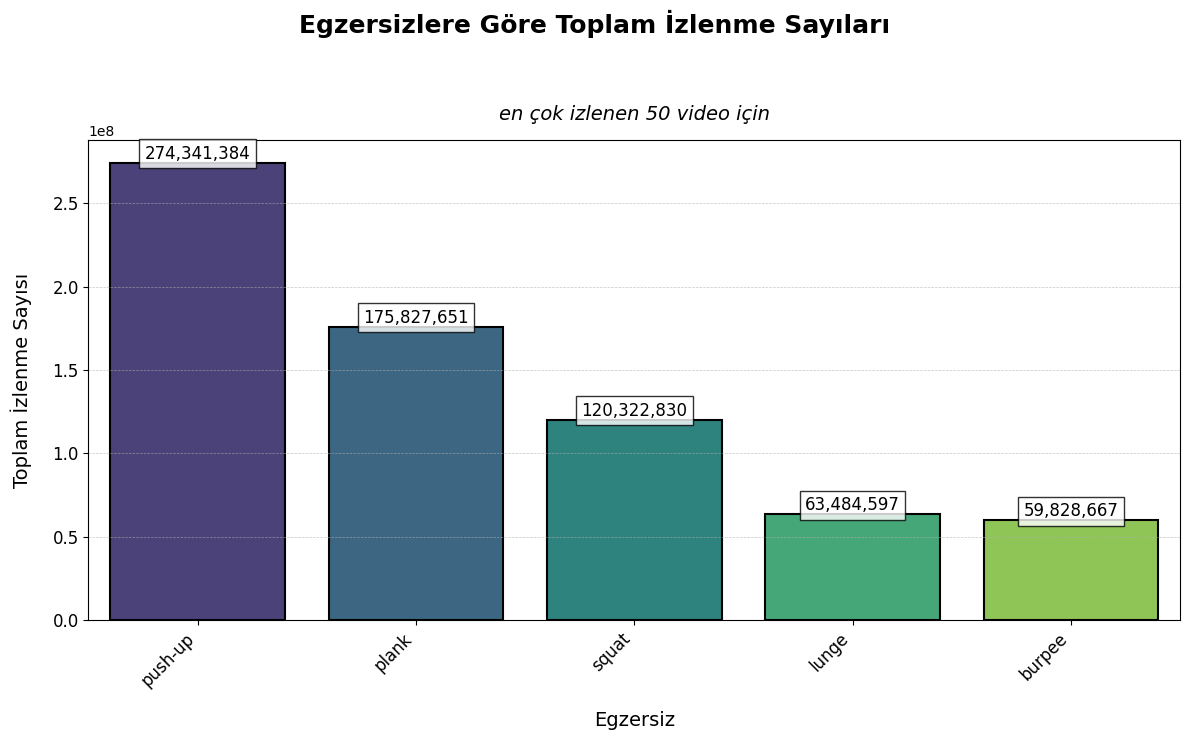

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veriler
data = {
    'Egzersiz': ['push-up', 'plank', 'squat', 'lunge', 'burpee'],
    'Toplam İzlenme': [274341384, 175827651, 120322830, 63484597, 59828667]
}
df = pd.DataFrame(data)

# Çubuk grafik
plt.figure(figsize=(12, 7))
sns.barplot(x='Egzersiz', y='Toplam İzlenme', data=df, palette="viridis", hue='Egzersiz', legend=False, edgecolor='black', linewidth=1.5)

# İzlenme sayılarını ekleme
for i, v in enumerate(df['Toplam İzlenme']):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))

# Başlıklar
plt.suptitle("Egzersizlere Göre Toplam İzlenme Sayıları", fontsize=18, weight='bold', y=1.05)
plt.title("en çok izlenen 50 video için", fontsize=14, style='italic', y=1.04, pad=0, ha='center')

# Eksenler
plt.xlabel("Egzersiz", fontsize=14, labelpad=15)
plt.ylabel("Toplam İzlenme Sayısı", fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7, axis='y')

# Grafiği kaydet (notebook dizinine)
plt.savefig("cubuk_grafik.png", dpi=300, bbox_inches='tight')

# Grafiği göster
plt.tight_layout()
plt.show()

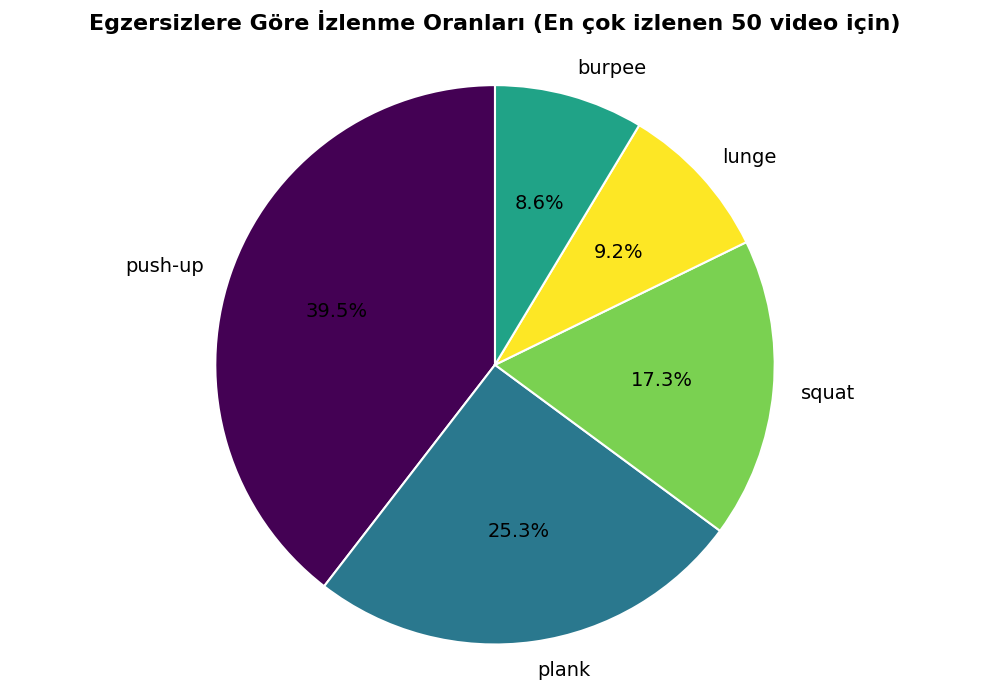

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Veriler
data = {
    'Egzersiz': ['push-up', 'plank', 'squat', 'lunge', 'burpee'],
    'Toplam İzlenme': [274341384, 175827651, 120322830, 63484597, 59828667]
}
df = pd.DataFrame(data)

# Yüzdelik oranlar
total_views = df['Toplam İzlenme'].sum()
df['Yüzde'] = (df['Toplam İzlenme'] / total_views) * 100

# Pasta grafik
plt.figure(figsize=(10, 7))
plt.pie(df['Yüzde'], labels=df['Egzersiz'], autopct='%1.1f%%', startangle=90, 
        colors=['#440154', '#2a788e', '#7ad151', '#fde725', '#20a387'], 
        wedgeprops=dict(edgecolor='white', linewidth=1.5), 
        textprops={'fontsize': 14})

# Başlık
plt.title("Egzersizlere Göre İzlenme Oranları (En çok izlenen 50 video için)", fontsize=16, weight='bold', pad=20)

# Grafiği kaydet (notebook dizinine)
plt.savefig("pasta_grafik.png", dpi=300, bbox_inches='tight')

# Grafiği göster
plt.axis('equal')
plt.tight_layout()
plt.show()